In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# reading in data from fraud dataset
data_frame = pd.read_csv('FraudDataset\\fraudTrain.csv')

# getting the month and year seperated from the dob column
data_frame['dob_year'] = pd.DatetimeIndex(data_frame['dob']).year
data_frame['dob_month'] = pd.DatetimeIndex(data_frame['dob']).month
data_frame = data_frame.drop(columns=['dob'])

# making gender a numerical value
data_frame['gender'] = data_frame['gender'].apply(lambda x: 1 if x == "M" else 0)

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = data_frame[['dob_year', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
kmeans_class = KMeans(n_clusters=3, random_state=42)
kmeans_class.fit(X_scaled)
data_frame['cluster'] = kmeans_class.labels_

C:\Users\S540082\ds-venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(X_scaled)
data_frame_pca = pd.DataFrame(data=princ_comp, columns=['PC1', 'PC2'])
data_frame_pca['cluster'] = data_frame['cluster']

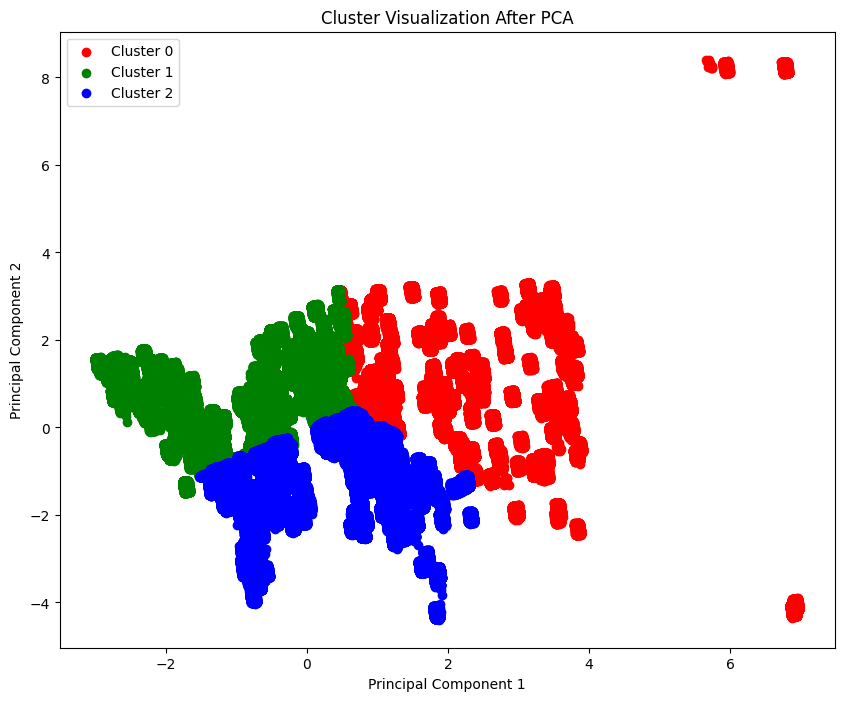

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue']
for color, cluster in zip(colors, range(3)):
    plt.scatter(data_frame_pca[data_frame_pca['cluster'] == cluster]['PC1'], data_frame_pca[data_frame_pca['cluster'] == cluster]['PC2'], label=f'Cluster {cluster}', c=color)
plt.title("Cluster Graph")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# NN time

In [19]:
from sklearn.neural_network import MLPClassifier
X = data_frame[['dob_year','amt','zip','lat','long','city_pop','unix_time','merch_lat','merch_long']]
y = data_frame['is_fraud']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

model = MLPClassifier(solver='adam',activation='relu',alpha=1e-5, hidden_layer_sizes=(200), random_state=1, max_iter=300)
model.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=200, max_iter=300, random_state=1)

In [20]:
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257865
           1       0.57      0.26      0.36      1470

    accuracy                           0.99    259335
   macro avg       0.78      0.63      0.68    259335
weighted avg       0.99      0.99      0.99    259335

Accuracy: 0.9946941215030751
